<a href="https://colab.research.google.com/github/allanbraquiel/Data_Science_Projects/blob/master/Desafio_DIO_Adventure_Works.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
import plotly.graph_objs as go
import cufflinks as cf
cf.go_offline()
from plotly.offline import plot, iplot, init_notebook_mode
init_notebook_mode(connected=True)
import plotly.express as px

In [3]:
df = pd.read_excel("/content/drive/MyDrive/Colab_Notebooks/Desafio DIO/datasets/AdventureWorks.xlsx")

In [8]:
df.head(2)

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
1,2008-05-12,2008-05-17,306,384,19051,200805123CS567,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 904 entries, 0 to 903
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Data Venda      904 non-null    datetime64[ns]
 1   Data Envio      904 non-null    datetime64[ns]
 2   ID Loja         904 non-null    int64         
 3   ID Produto      904 non-null    int64         
 4   ID Cliente      904 non-null    int64         
 5   No. Venda       904 non-null    object        
 6   Custo Unitário  904 non-null    float64       
 7   Preço Unitário  904 non-null    float64       
 8   Quantidade      904 non-null    int64         
 9   Valor Desconto  904 non-null    float64       
 10  Valor Venda     904 non-null    float64       
 11  Produto         904 non-null    object        
 12  Fabricante      904 non-null    object        
 13  Marca           904 non-null    object        
 14  Classe          904 non-null    object        
 15  Cor   

In [7]:
df.describe()

,ID Loja,ID Produto,ID Cliente,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda
count,904.000000,904.000000,904.000000,904.000000,904.000000,904.000000,904.000000,904.000000
mean,270.015487,1225.238938,19029.092920,272.006150,742.527965,62.950221,689.123294,6620.139538
std,50.955280,706.698742,96.427655,129.765051,368.589889,148.945964,822.363117,4319.407257
min,199.000000,366.000000,18815.000000,5.090000,9.990000,2.000000,0.000000,159.840000
25%,199.000000,384.000000,18964.750000,324.690000,758.000000,6.000000,0.000000,3920.000000
50%,306.000000,1202.000000,19060.000000,330.660000,980.000000,9.000000,461.166000,5798.700000
75%,307.000000,1226.000000,19107.000000,348.580000,998.000000,17.000000,1005.075000,7986.000000
max,307.000000,2497.000000,19145.000000,348.580000,999.000000,1560.000000,6272.000000,29400.000000


In [31]:
df.isnull().sum()

Data Venda        0
Data Envio        0
ID Loja           0
ID Produto        0
ID Cliente        0
No. Venda         0
Custo Unitário    0
Preço Unitário    0
Quantidade        0
Valor Desconto    0
Valor Venda       0
Produto           0
Fabricante        0
Marca             0
Classe            0
Cor               0
Custo Total       0
Lucro Total       0
Tempo Entrega     0
Ano Venda         0
dtype: int64

In [9]:
# Criando uma coluna com o valor total do custo
df["Custo Total"] = df["Custo Unitário"] * df["Quantidade"]

In [15]:
# Criando uma coluna com o valor do lucro
df["Lucro Total"]  = df["Valor Venda"] - df["Custo Total"] 

In [16]:
df.head(2)

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,Custo Total,Lucro Total
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48,2456.52
1,2008-05-12,2008-05-17,306,384,19051,200805123CS567,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48,2456.52


In [17]:
# Tempo de envio para cada entrega, em dias
df["Tempo Entrega"] = (df["Data Envio"] - df["Data Venda"]).dt.days

In [19]:
df.head(2)

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,Custo Total,Lucro Total,Tempo Entrega
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48,2456.52,20
1,2008-05-12,2008-05-17,306,384,19051,200805123CS567,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48,2456.52,5


In [20]:
# Qual a média de dias para entrega por marca?
df.groupby("Marca")["Tempo Entrega"].mean()

Marca
Adventure Works    8.663866
Contoso            8.470930
Fabrikam           8.510121
Name: Tempo Entrega, dtype: float64

In [48]:
df["Ano Venda"] = df["Data Venda"].dt.year

In [36]:
# Qual a média de lucro por ano e marca?
df.groupby([df["Data Venda"].dt.year, "Marca"])["Lucro Total"].mean().reset_index()

,Data Venda,Marca,Lucro Total
0,2008,Adventure Works,2977.098641
1,2008,Contoso,705.200012
2,2008,Fabrikam,5444.127797
3,2009,Adventure Works,3002.926519
4,2009,Contoso,1502.814691
5,2009,Fabrikam,4971.593029


In [71]:
# Qual a média de lucro por ano e marca?
df.groupby("Marca")["Lucro Total"].mean().iplot(kind="bar")

In [38]:
# Qual o cliente que mais compra?
df["ID Cliente"].value_counts(ascending=False).head(10)

19060    27
19094    22
19057    22
19052    21
19053    18
19107    16
19054    16
19061    16
19062    15
19111    15
Name: ID Cliente, dtype: int64

In [42]:
# Quais produtos são mais vendidos?
df.groupby("ID Produto")["Quantidade"].sum().sort_values(ascending=False)

ID Produto
2496    25232
2497    25008
366      1089
1203     1087
384      1047
1155      926
1226      884
1202      845
1178      789
Name: Quantidade, dtype: int64

In [65]:
# Quais produtos são mais vendidos?
df.groupby("Produto")["Quantidade"].sum().sort_values(ascending=False).iplot(kind="bar")

In [43]:
df.columns

Index(['Data Venda', 'Data Envio', 'ID Loja', 'ID Produto', 'ID Cliente',
       'No. Venda', 'Custo Unitário', 'Preço Unitário', 'Quantidade',
       'Valor Desconto', 'Valor Venda', 'Produto', 'Fabricante', 'Marca',
       'Classe', 'Cor', 'Custo Total', 'Lucro Total', 'Tempo Entrega',
       'Ano Venda'],
      dtype='object')

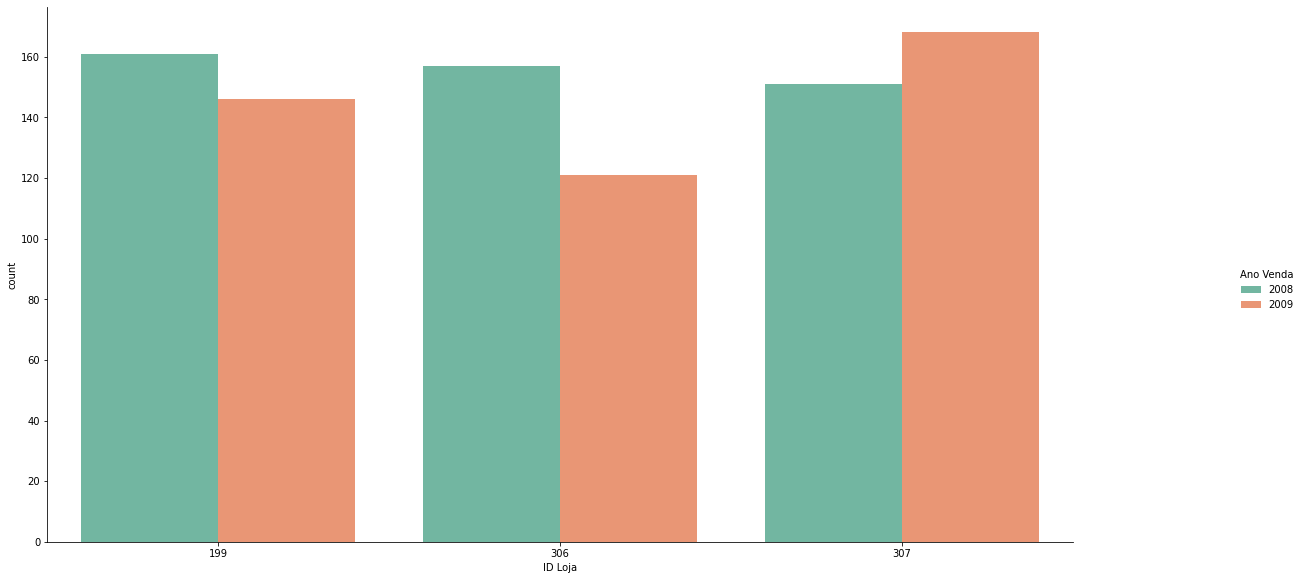

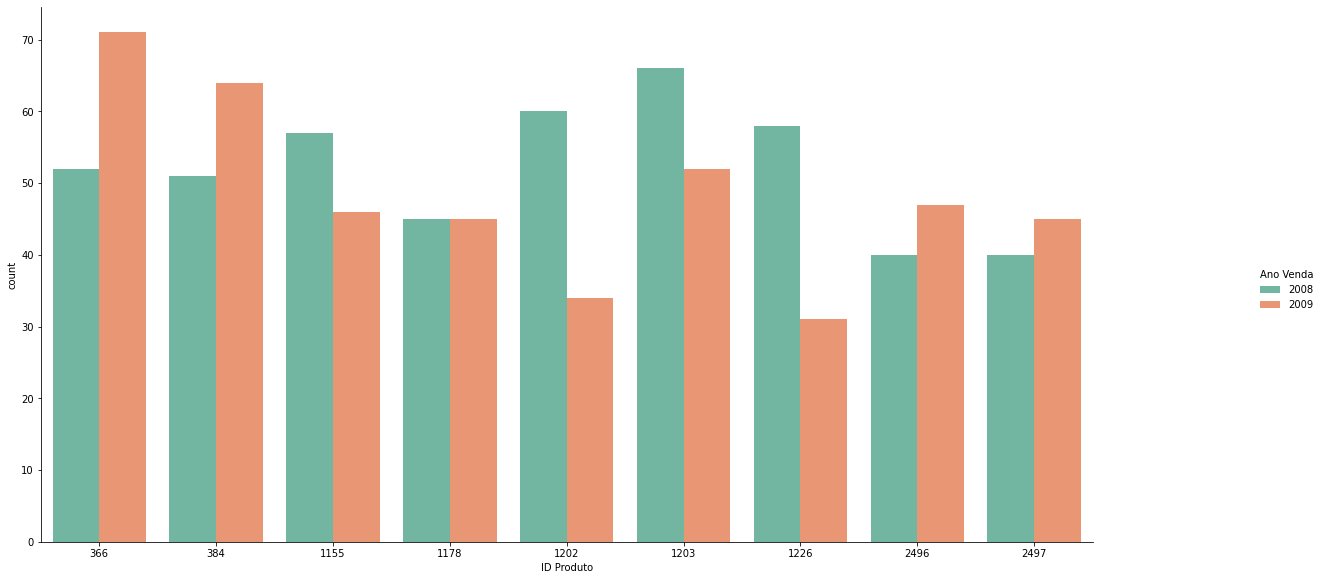

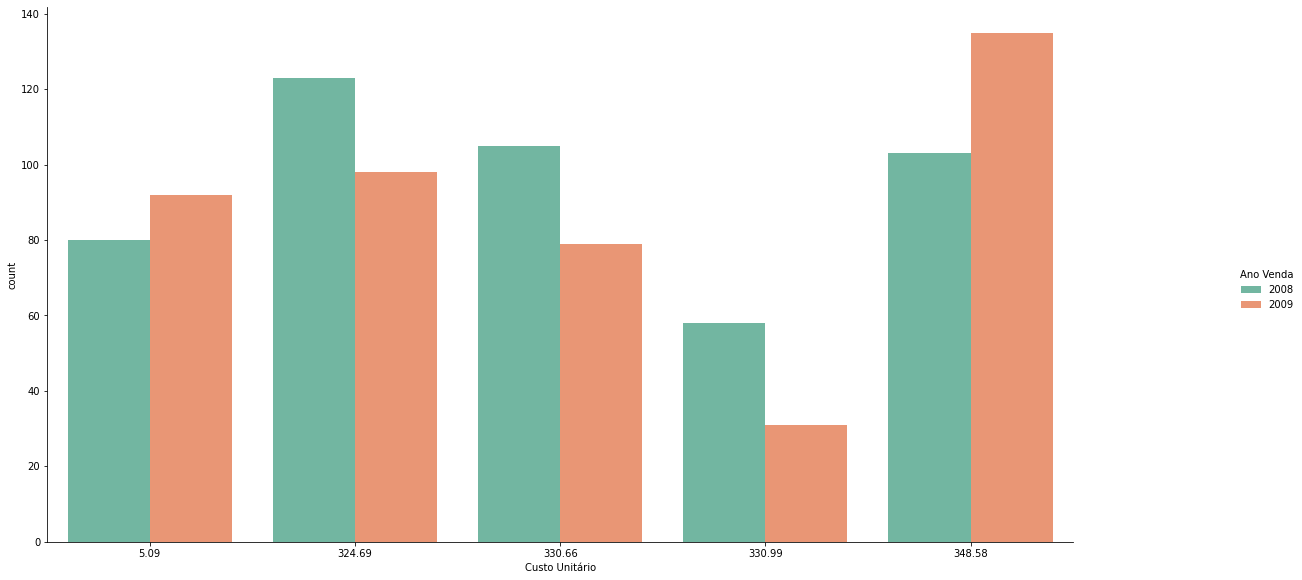

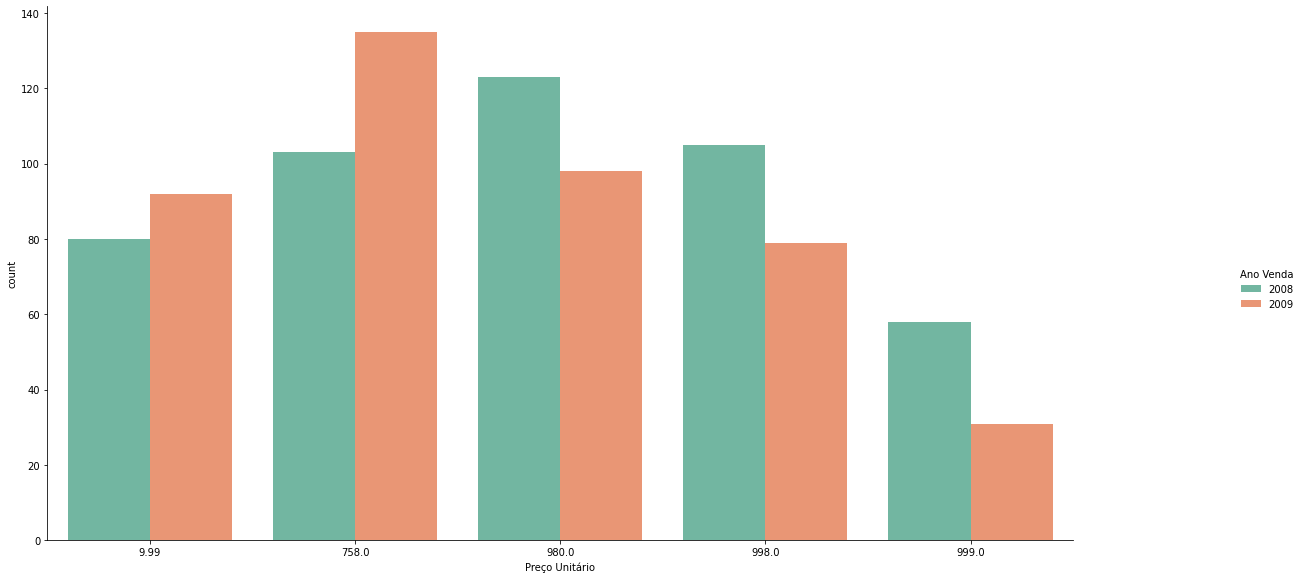

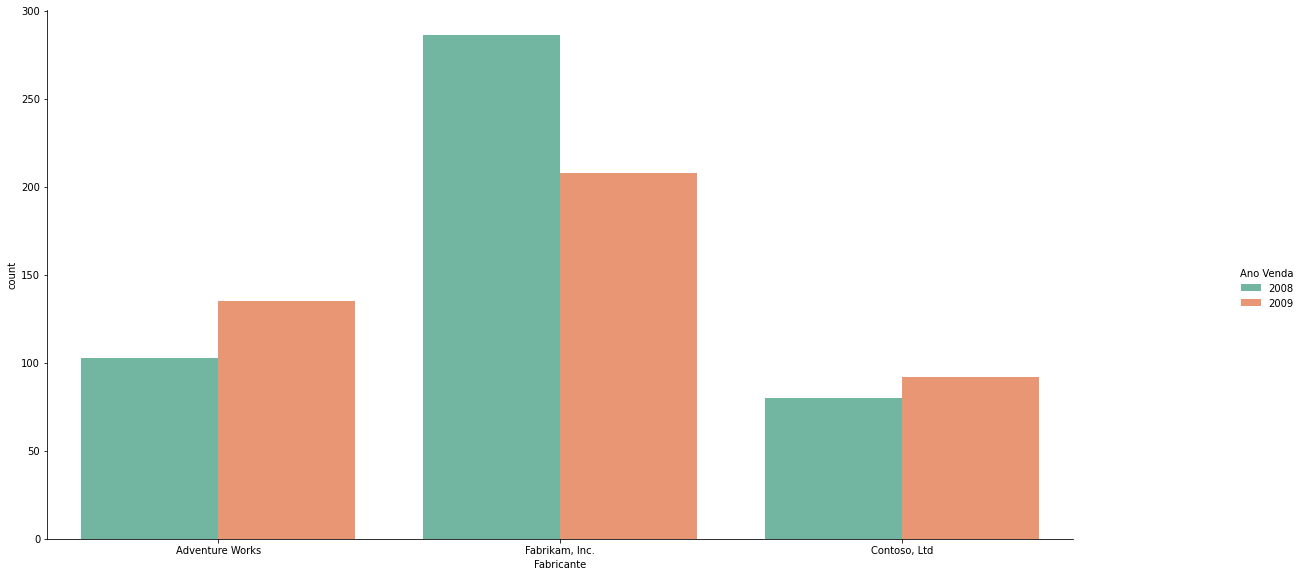

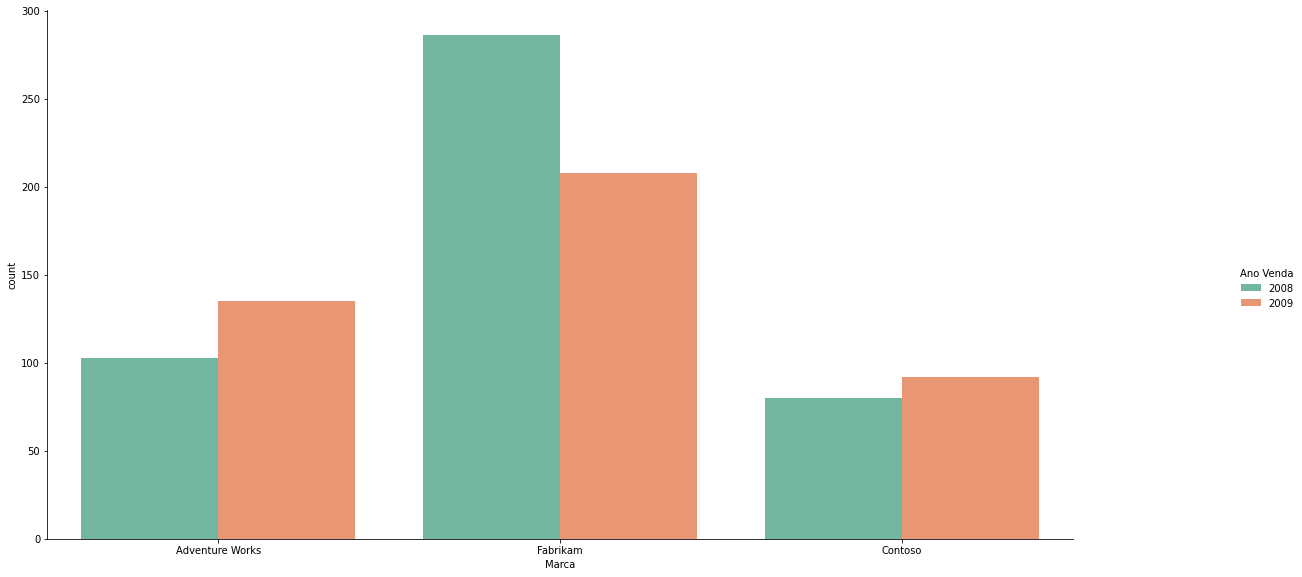

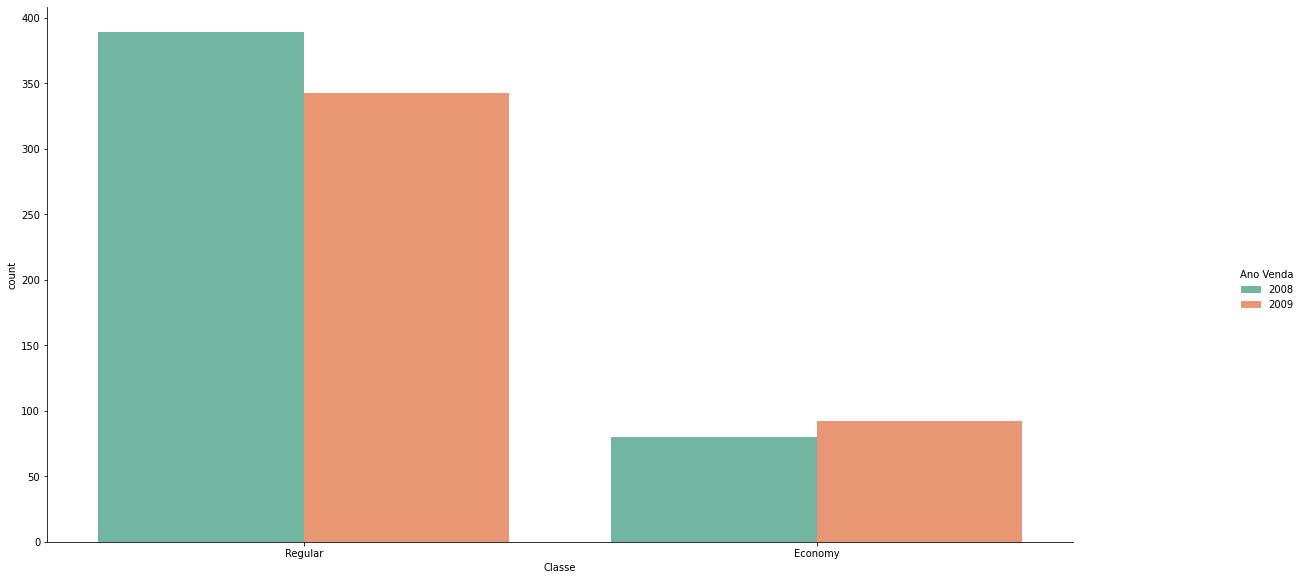

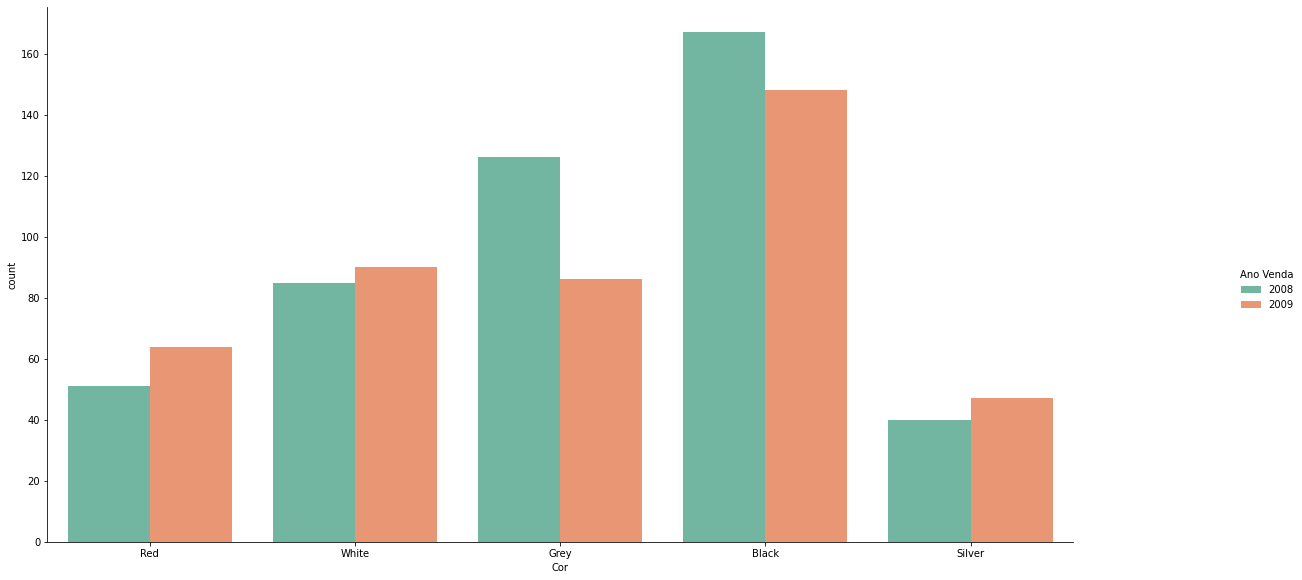

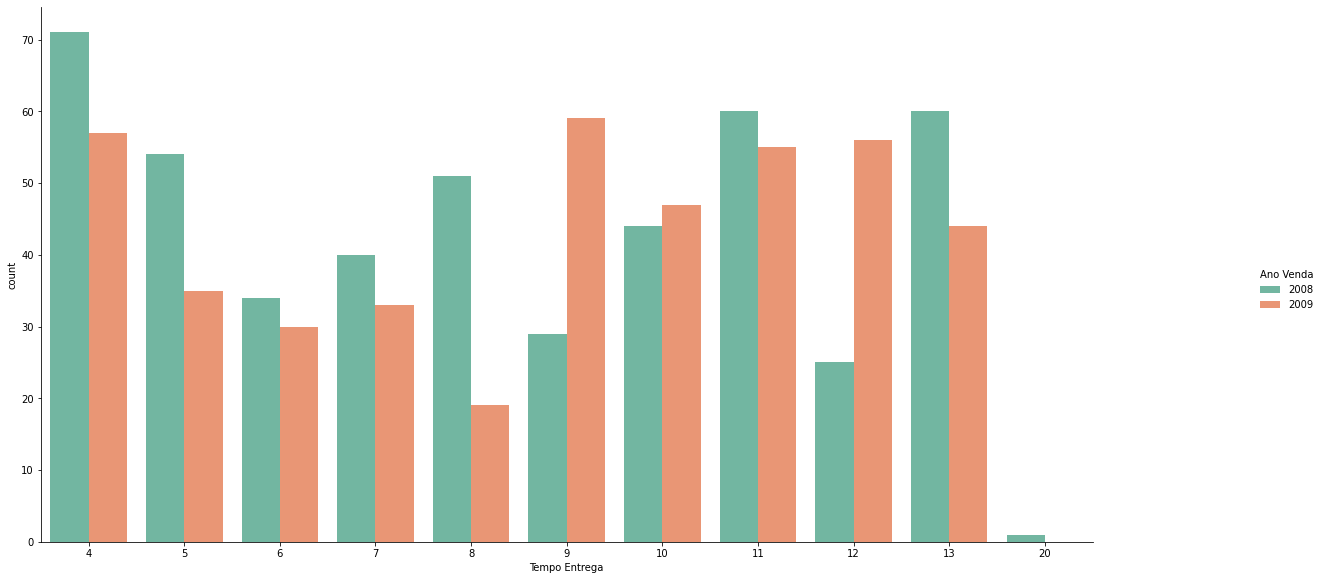

In [58]:
lista = ['ID Loja', 'ID Produto', 'Custo Unitário', 'Preço Unitário',
         'Fabricante', 'Marca', 'Classe', 'Cor', 'Tempo Entrega']

for i in lista:
  g = sns.catplot(x=i, kind="count", palette="Set2", hue="Ano Venda",data=df)
  g.fig.set_figwidth(20.27)
  g.fig.set_figheight(8.7)
  

In [51]:
# Renderizar o Plotly no colab
import plotly.io as pio
pio.renderers
pio.renderers.default = "colab"

In [57]:
df.groupby(df["Data Venda"].dt.month)["Lucro Total"].sum().iplot(kind="line", title="Lucro por mês")

In [80]:
df.groupby(df["Data Venda"].dt.year)["Lucro Total"].sum().iplot(kind="bar")